In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
pi = math.pi

In [3]:
def a_n(n):
    a = (-1/(pi * n**2)) * (1 - (-1)**n)

    return a

def b_n(n):
    b = (1/n)*(-1)**n

    return b 

def series_approx(a_coeff, b_coeff, x_input, a_0=0):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos((i + 1) * x) + b_coeff[i] * math.sin((i + 1) * x)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output

In [4]:
vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)

a_0 = pi / 2


x_domain = np.linspace(-3*pi, 3*pi, 1000)  # iterated x_domain from 0 to pi
y_function_1_piece = np.multiply(-1, x_domain[(x_domain<0) & (x_domain > -pi)])
y_function_2_piece = np.multiply(0, x_domain[(x_domain>0) & (x_domain < pi)])
y_concat = np.concatenate((y_function_1_piece, y_function_2_piece), axis=None)
# n = np.arange(1, value + 1, 1, dtype=np.int32)  # number of coefficients to generate

max_number_coefficients = 100
n = np.arange(1, max_number_coefficients + 1, 1, dtype=np.int32)
a = vector_a(n)  # C_n terms are generated
b = vector_b(n)


In [5]:
unit = pi
x_tick = np.arange(-3*pi, 3*pi + unit, unit)
pi_ints = np.arange(-3,4,1)
x_label = [f'{i}$\pi$' for i in pi_ints]

# print(x_label)

['-3$\\pi$', '-2$\\pi$', '-1$\\pi$', '0$\\pi$', '1$\\pi$', '2$\\pi$', '3$\\pi$']


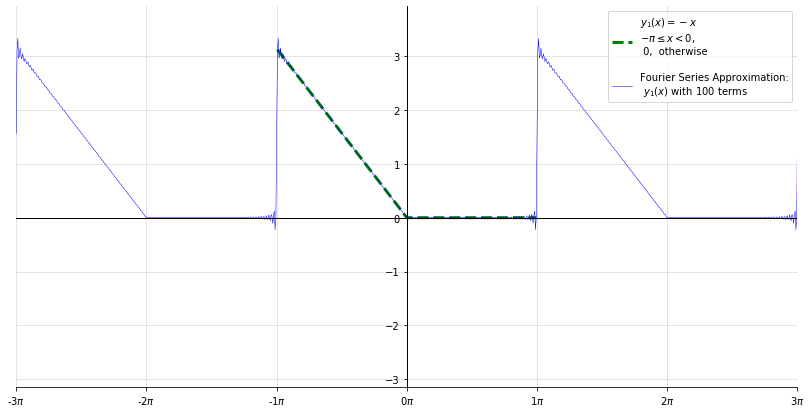

In [7]:

y_estimates = series_approx(a, b, x_domain, a_0)

fig, ax = plt.subplots(ncols=1, figsize=(14, 7))
ax.set_ylim((-pi, pi*1.25))
ax.set_xlim((-3*pi, 3*pi))
ax.plot(x_domain[(x_domain > -pi) & (x_domain < pi)], y_concat, '--', color='g',label='$y_1(x) = -x$\n$   -\pi \leq  x < 0$, \n 0,  otherwise \n',  linewidth=3)
ax.plot(x_domain, y_estimates, color='b', linewidth=0.5, label=f'Fourier Series Approximation:\n $y_1(x)$ with {max_number_coefficients} terms'  )

ax.axhline(linewidth=1, color='k')
ax.axvline(linewidth=1, color='k')


ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left']
ax.spines['bottom']

ax.set_xticks(x_tick)
ax.set_xticklabels(x_label)  
ax.legend(loc=0)
ax.grid(linestyle='--', linewidth=0.5)

plt.savefig('HW5_Problem_3.pdf', bbox_inches="tight")
plt.show()